In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "ctgan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.017798,-0.044642,-0.037122,-0.032138,0.153914,-0.051101,0.060013,0.126171,0.099699,0.053438,39.0
1,-0.036639,0.050680,0.123451,0.007424,0.059626,0.027511,0.022819,0.015680,0.009042,0.049899,38.0
2,-0.041527,-0.044642,-0.073950,0.107513,-0.084513,0.011299,0.171269,-0.038848,-0.085357,0.090301,89.0
3,-0.107226,-0.044642,-0.042283,-0.019565,0.076703,0.062928,0.016355,0.039696,-0.117129,-0.054605,65.0
4,0.067672,0.050680,0.005071,0.132044,-0.042512,-0.006534,0.048677,-0.006802,-0.069407,0.083977,51.0
5,0.043044,-0.044642,-0.032944,0.049892,0.067060,-0.014186,0.091262,0.023221,-0.114281,0.049284,218.0
6,0.061390,-0.044642,0.061605,-0.067707,0.047322,0.142046,0.000078,0.036209,-0.031486,-0.101467,277.0
7,-0.003201,0.050680,-0.003159,0.115252,0.072574,0.070591,-0.024997,0.024917,-0.123836,-0.119855,39.0
8,-0.052319,0.050680,-0.034373,-0.024037,-0.086009,0.017375,-0.023670,0.031807,-0.033255,-0.086029,248.0
9,-0.097067,0.050680,-0.039653,0.048210,0.086922,-0.084474,0.090830,0.027730,-0.034803,-0.035910,105.0


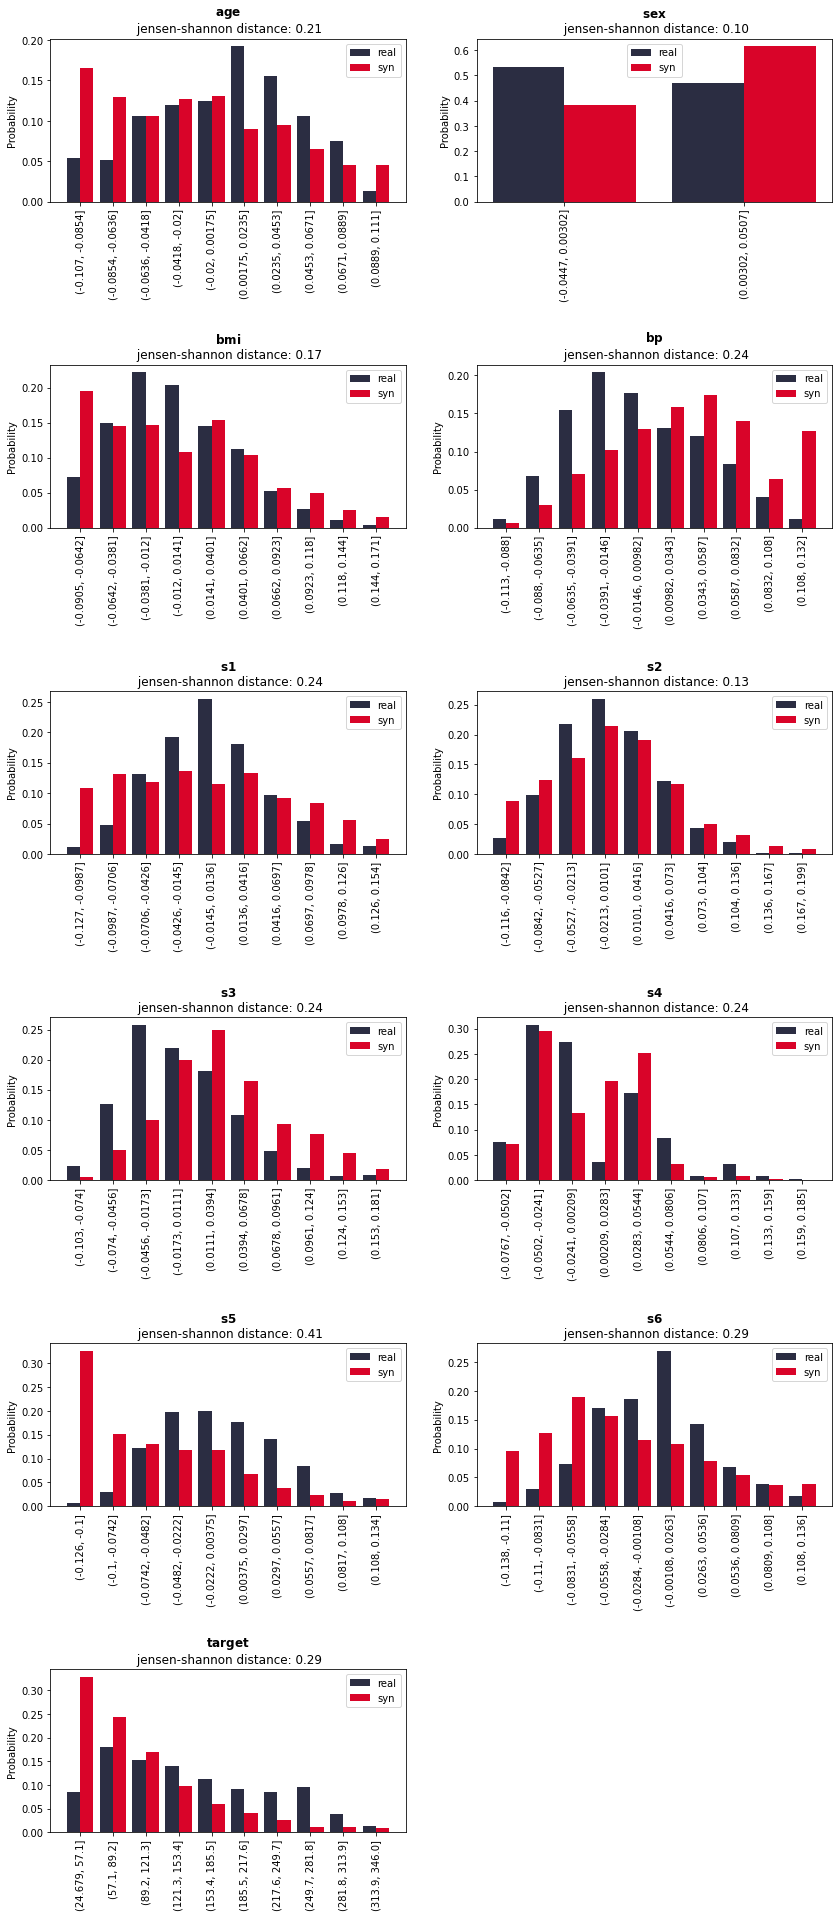

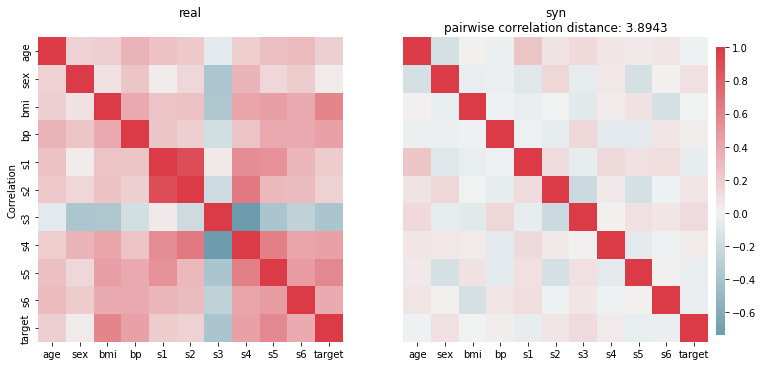

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : ctgan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.084491,0.091383,0.088433,0.002900,0.089424,0.003446,3,0,0.01
sanity.inlier_probability,0.934389,0.945701,0.938914,0.004887,0.936652,0.005656,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,0.003017,0.001067,0.002262,0.001131,3,0,0.01
statistical.marginal.jensenshannon_distance,0.205850,0.249227,0.228330,0.017744,0.229911,0.021689,3,0,0.17
statistical.marginal.chi_squared_test,0.956506,0.998328,0.972699,0.018331,0.963263,0.020911,3,0,0.02
statistical.joint.feature_correlation,3.657100,3.988971,3.782666,0.147023,3.701927,0.165936,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.153787,0.194795,0.170485,0.017586,0.162873,0.020504,3,0,3.78
statistical.marginal.inverse_kl_divergence,0.809653,0.869094,0.837163,0.024467,0.832741,0.029720,3,0,0.02
